In [ ]:
from citipy import citipy
import matplotlib.pyplot as plt
from scipy.stats import linregress
import requests
import pandas as pd
import numpy as np
import json
from api_keys import weather_key

In [128]:
# Range of Latitudes & Longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [129]:
# List for Holding lat_lngs & Cities
lat_lngs = []
cities = []

# Create a Set of Random lat & lng Combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify Nearest City for Each lat, lng Combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the City is Unique, Then Add it to a Cities List
    if city not in cities:
        cities.append(city)

# Print the City Count to Confirm Sufficient Count
len(cities)

633

In [130]:
print(cities)

['san patricio', 'butaritari', 'rikitea', 'palabuhanratu', 'mataura', 'margate', 'hilo', 'faanui', 'dwarka', 'teya', 'port-cartier', 'champerico', 'los llanos de aridane', 'trelew', 'mar del plata', 'tsihombe', 'ushuaia', 'lavrentiya', 'santa isabel', 'stolbovaya', 'port alfred', 'port hardy', 'chokurdakh', 'busselton', 'mandalgovi', 'ilulissat', 'souillac', 'mys shmidta', 'norman wells', 'divnogorsk', 'hobart', 'petropavlovsk-kamchatskiy', 'san policarpo', 'cockburn town', 'karaul', 'chuy', 'burica', 'gat', 'mogadishu', 'turukhansk', 'victoria', 'kaitangata', 'kodiak', 'kabare', 'vaini', 'tautira', 'khatanga', 'castro', 'gunjur', 'kapaa', 'bengkulu', 'tual', 'raudeberg', 'rila', 'kintampo', 'makhu', 'barentsburg', 'kamenka', 'college', 'clyde river', 'avarua', 'saint george', 'tomatlan', 'punta arenas', 'yellowknife', 'port elizabeth', 'puerto ayora', 'qaqortoq', 'owensboro', 'paoua', 'esperance', 'cabrobo', 'price', 'taolanaro', 'cape town', 'tiksi', 'nemuro', 'hals', 'jaguarari', 'n

In [131]:

city_id = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
latitude = []
longitude = []


url = 'https://api.openweathermap.org/data/2.5/weather?'



for city in cities:
    try:
        query_url = url + "q=" + city + "&appid=" + weather_key + "&units=imperial"
        response = requests.get(query_url).json()
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        temperature.append(response["main"]["temp"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_id.append(response["id"])
        city_num = response["id"]
        print(f'processing - city:{city}city #:{city_num}')
    except:
        print('skipped')

processing - city:san patriciocity #:4726521
processing - city:butaritaricity #:2110227
processing - city:rikiteacity #:4030556
skipped
processing - city:matauracity #:6201424
processing - city:margatecity #:2643044
processing - city:hilocity #:5855927
processing - city:faanuicity #:4034551
processing - city:dwarkacity #:1272140
processing - city:teyacity #:1489656
processing - city:port-cartiercity #:6111696
processing - city:champericocity #:3598787
processing - city:los llanos de aridanecity #:2514651
processing - city:trelewcity #:3833883
processing - city:mar del platacity #:3430863
skipped
processing - city:ushuaiacity #:3833367
processing - city:lavrentiyacity #:4031637
processing - city:santa isabelcity #:3450188
processing - city:stolbovayacity #:487441
processing - city:port alfredcity #:964432
processing - city:port hardycity #:6111862
processing - city:chokurdakhcity #:2126123
processing - city:busseltoncity #:2075265
processing - city:mandalgovicity #:2030065
processing - 

Text(0.5, 1.0, 'Temperature (F) vs. Latitude')

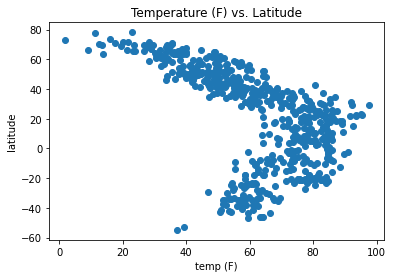

In [132]:
plt.scatter(x=temperature,y=latitude)
plt.xlabel('temp (F)')
plt.ylabel('latitude')
plt.title('Temperature (F) vs. Latitude')

#### The code above created a scatter plot that includes 500+ cities temperatures vs their latitudes. The plot aims to determine if there is a relationship between a city's latitude and its temperature. This is a very interesting scatter plot because it shows us that the temperature at the poles is significantly lower than at the equator

Text(0.5, 1.0, 'Humidity (%) vs. Latitude')

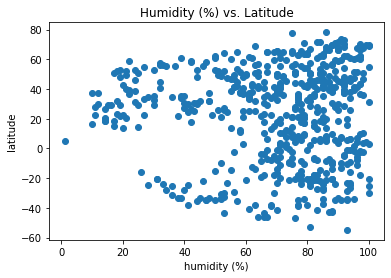

In [133]:
plt.scatter(x=humidity,y=latitude)
plt.xlabel('humidity (%)')
plt.ylabel('latitude')
plt.title('Humidity (%) vs. Latitude')

#### This analysis involves determining if latitude has any impact on humidity. The general spread of data points in the scatter plot indicate that there is no relationship between a city's latitude and its humidity. 

Text(0.5, 1.0, 'Cloudiness (%) vs. Latitude')

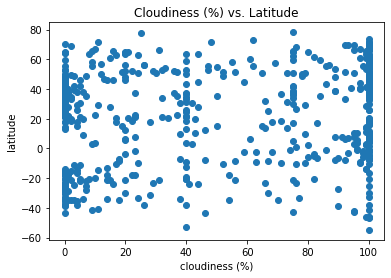

In [134]:
plt.scatter(x=cloudiness,y=latitude)
plt.xlabel('cloudiness (%)')
plt.ylabel('latitude')
plt.title('Cloudiness (%) vs. Latitude')

#### We can see that this scatter plot is indicative of no relationship, but there seems to be an interesting pattern of data points appearing at 0, 40, 80, and 100% cloudiness. This may suggest that these cloudiness levels are most common, or a sign of measuring bias in some way. 

Text(0.5, 1.0, 'Wind Speed (mph) vs. Latitude')

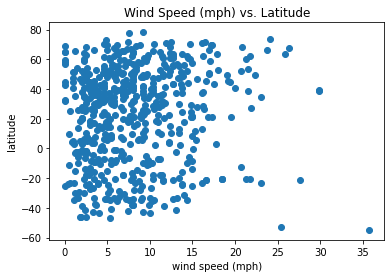

In [135]:
plt.scatter(x=wind_speed,y=latitude)
plt.xlabel('wind speed (mph)')
plt.ylabel('latitude')
plt.title('Wind Speed (mph) vs. Latitude')

#### This analysis also shows no relationship given the general spread of data points in the scatter plot. However, we can see the majority of data points falling below a wind speed of 10mph. This shows us that wind speed above 10mph are not as likely, at least in our sample

In [147]:
dfDict = {
    'temperature': temperature,
    'humidity': humidity,
    'cloudiness': cloudiness,
    'wind speed': wind_speed,
    'latitude': latitude,
    'longitude': longitude
}

df = pd.DataFrame(data=dfDict)
df

,temperature,humidity,cloudiness,wind speed,latitude,longitude
0,79.66,83,44,6.64,28.0170,-97.5169
1,81.64,71,42,17.81,3.0707,172.7902
2,78.01,85,66,16.15,-23.1203,-134.9692
3,63.95,67,100,1.86,-46.1927,168.8643
4,51.73,76,19,1.01,51.3813,1.3862
...,...,...,...,...,...,...
579,50.00,87,0,5.75,48.8534,2.3488
580,83.70,71,99,10.63,2.6708,72.8944
581,56.88,90,100,8.03,45.5331,12.6448
582,58.30,70,0,5.99,38.6979,-9.4215


In [137]:
north_hemis = df.loc[df['latitude']>=0,:]
south_hemis = df.loc[df['latitude']<0,:]

north_hemis.head()

,temperature,humidity,cloudiness,wind speed,latitude,longitude
0,79.66,83,44,6.64,28.0170,-97.5169
1,81.64,71,42,17.81,3.0707,172.7902
4,51.73,76,19,1.01,51.3813,1.3862
5,72.23,93,100,6.91,19.7297,-155.0900
7,82.92,68,0,12.19,22.2394,68.9678


The r-squared is: 0.7538683371764773


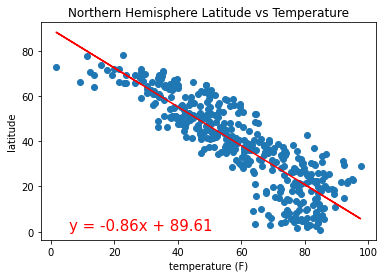

In [138]:
x_values = north_hemis['temperature']
y_values = north_hemis['latitude']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('temperature (F)')
plt.ylabel('latitude')
plt.title('Northern Hemisphere Latitude vs Temperature')
print(f"The r-squared is: {rvalue**2}")

#### The linear regression indicates a fairly strong negative relationship between latitude and temperature. We can see this as temperature increasing as latitude decreases. We know that it has fairly strong predictive power based on its r-squared of .76

The r-squared is: 0.44166772391236436


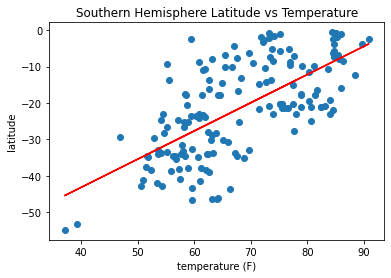

In [139]:
x_values = south_hemis['temperature']
y_values = south_hemis['latitude']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('temperature (F)')
plt.ylabel('latitude')
plt.title('Southern Hemisphere Latitude vs Temperature')
print(f"The r-squared is: {rvalue**2}")

#### This linear regression model is indicative of a strong positive relationship between latitude and temperature. This makes sense because the data involves southern hemisphere cities so it should be the inverse of northern hemisphere cities as we've seen in the previous model. The r-squared of .51 is interestingly less predictive compared to our northern hemisphere data.

The r-squared is: 0.012913436917888007


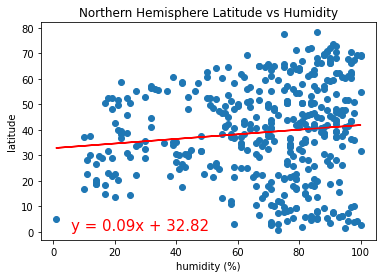

In [140]:
x_values = north_hemis['humidity']
y_values = north_hemis['latitude']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('humidity (%)')
plt.ylabel('latitude')
plt.title('Northern Hemisphere Latitude vs Humidity')
print(f"The r-squared is: {rvalue**2}")

#### Unsurprisingly, we have a very weak relationship between humidity and latitude as seen by the regression line having only a little slope. The r-squared of .02 also shows us that our regression line doesn't have much predictive power. 

The r-squared is: 0.052438713821330196


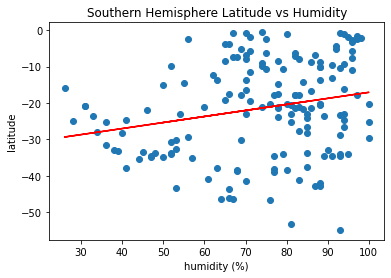

In [141]:
x_values = south_hemis['humidity']
y_values = south_hemis['latitude']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('humidity (%)')
plt.ylabel('latitude')
plt.title('Southern Hemisphere Latitude vs Humidity')
print(f"The r-squared is: {rvalue**2}")

#### This model also shows a very weak relationship, lack of slope in the regression line and an r-squared value of .02. This model shows us that we cannot confidently predict new datapoints of one of these variables when given the other. 

The r-squared is: 0.01413763461932459


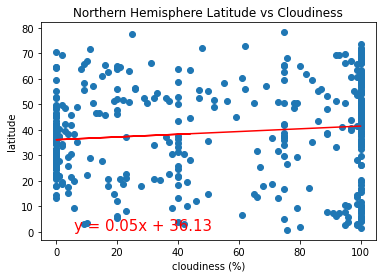

In [142]:
x_values = north_hemis['cloudiness']
y_values = north_hemis['latitude']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('cloudiness (%)')
plt.ylabel('latitude')
plt.title('Northern Hemisphere Latitude vs Cloudiness')
print(f"The r-squared is: {rvalue**2}")

#### Similarly to our last analyses on humidity, cloudiness has little connection with latitude. We can see this by the small slope in the regression line, and a r-squared of .008.

The r-squared is: 0.07092399864058778


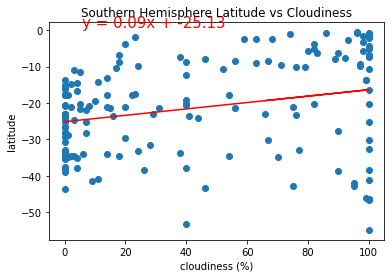

In [143]:
x_values = south_hemis['cloudiness']
y_values = south_hemis['latitude']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('cloudiness (%)')
plt.ylabel('latitude')
plt.title('Southern Hemisphere Latitude vs Cloudiness')
print(f"The r-squared is: {rvalue**2}")

#### Like our previous model on the northern hemisphere, the southern hemisphere's percentage of cloudiness has little connection with the latitude of the city. The r-squared value of .05 is very insignificant. 

The r-squared is: 0.026241060018032284


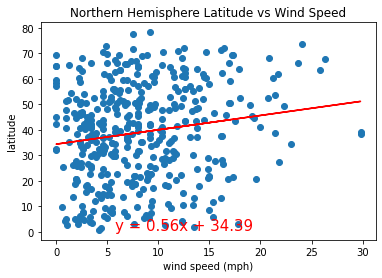

In [144]:
x_values = north_hemis['wind speed']
y_values = north_hemis['latitude']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('wind speed (mph)')
plt.ylabel('latitude')
plt.title('Northern Hemisphere Latitude vs Wind Speed')
print(f"The r-squared is: {rvalue**2}")

#### Comparing latitude with wind speed shows us that we have virtually no relationship reflected in the horizontal regression line. Also, the very small r-squared value is indicative of no relationship

The r-squared is: 0.026241060018032284


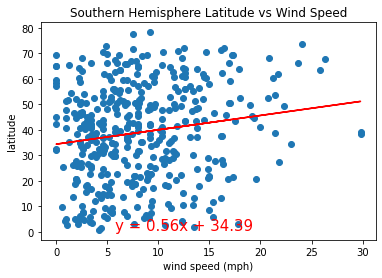

In [145]:
x_values = north_hemis['wind speed']
y_values = north_hemis['latitude']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('wind speed (mph)')
plt.ylabel('latitude')
plt.title('Southern Hemisphere Latitude vs Wind Speed')
print(f"The r-squared is: {rvalue**2}")

#### The southern hemisphere regression model comparing latitude to wind speed is very similiar to the northern hemisphere with no relationship. The r-squared value is also very insignificant showing no predicitve power.

## Conclusion - 3 Observable Trends
#### 1 There is a clear negative relationship between latitude and temperature, with a trend in higher temperatures as you approach the equator.
#### 2 While latitude was found to have little impact on wind speed, wind speed above 20mph was found to be very unlikely based on the data
#### 3 There was also found to be significantly more humidity in the northern hemisphere, especially with humidity levels over 60%